In [2]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from utils.utils_embedding import load_qa_dataset, evaluate_different_top_k
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

path_to = "codice"

# Settings

In [2]:
# load dataset QA
dataset_name = "QA/" + path_to + "/gpt-35-turbo_dataset.json"
# results top-k
top_k = 5
model_name = "paraphrase-multilingual-MiniLM-L12-v2"
list_top_k = [1, 3, 5, 10, 20]

# Load QA synthetic dataset

In [3]:
it_dataset = load_qa_dataset(dataset_name)

2025-07-23 17:08:33.660 | INFO     | utils.utils_embedding:load_qa_dataset:19 - Loading dataset from QA/codice/gpt-35-turbo_dataset.json


# View QA dataset sample

In [32]:
#print(it_dataset.queries["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
#print(it_dataset.relevant_docs["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
#print(it_dataset.corpus["80b9998c-32d4-42f7-94a7-1a36155b382b"])

# HuggingFace: paraphrase-multilingual-MiniLM-L12-v2

In [4]:
embed_model_paraphrase_l12 = HuggingFaceEmbedding(model_name=model_name)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: paraphrase-multilingual-MiniLM-L12-v2
Load pretrained SentenceTransformer: paraphrase-multilingual-MiniLM-L12-v2


In [7]:
df_results_no_finetuning = evaluate_different_top_k(it_dataset, embed_model_paraphrase_l12, list_top_k)

2025-07-23 17:09:20.631 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=1
100%|██████████| 703/703 [00:12<00:00, 57.04it/s]
2025-07-23 17:09:36.086 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=3
100%|██████████| 703/703 [00:12<00:00, 57.22it/s]
2025-07-23 17:09:51.492 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=5
100%|██████████| 703/703 [00:12<00:00, 56.61it/s]
2025-07-23 17:10:07.013 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=10
100%|██████████| 703/703 [00:12<00:00, 55.63it/s]
2025-07-23 17:10:22.753 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=20
100%|██████████| 703/703 [00:12<00:00, 55.25it/s]


# Finetuned paraphrase-multilingual-MiniLM-L12-v2

In [10]:
finetuned_model_name="finetuned-sentence-transformers/codice/finetuned-paraphrase-multilingual-MiniLM-L12-v2_gpt-35-turbo_dataset"

finetuned_embed_model = HuggingFaceEmbedding(model_name=finetuned_model_name)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: finetuned-sentence-transformers/codice/finetuned-paraphrase-multilingual-MiniLM-L12-v2_gpt-35-turbo_dataset
Load pretrained SentenceTransformer: finetuned-sentence-transformers/codice/finetuned-paraphrase-multilingual-MiniLM-L12-v2_gpt-35-turbo_dataset


In [11]:
df_results_finetuning = evaluate_different_top_k(it_dataset, finetuned_embed_model, list_top_k)

2025-07-23 17:11:47.375 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=1
100%|██████████| 703/703 [00:12<00:00, 56.75it/s]
2025-07-23 17:12:03.037 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=3
100%|██████████| 703/703 [00:12<00:00, 57.71it/s]
2025-07-23 17:12:18.312 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=5
100%|██████████| 703/703 [00:12<00:00, 57.21it/s]
2025-07-23 17:12:33.688 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=10
100%|██████████| 703/703 [00:12<00:00, 57.03it/s]
2025-07-23 17:12:49.116 | INFO     | utils.utils_embedding:evaluate_different_top_k:163 - Evaluating for top_k=20
100%|██████████| 703/703 [00:12<00:00, 56.60it/s]


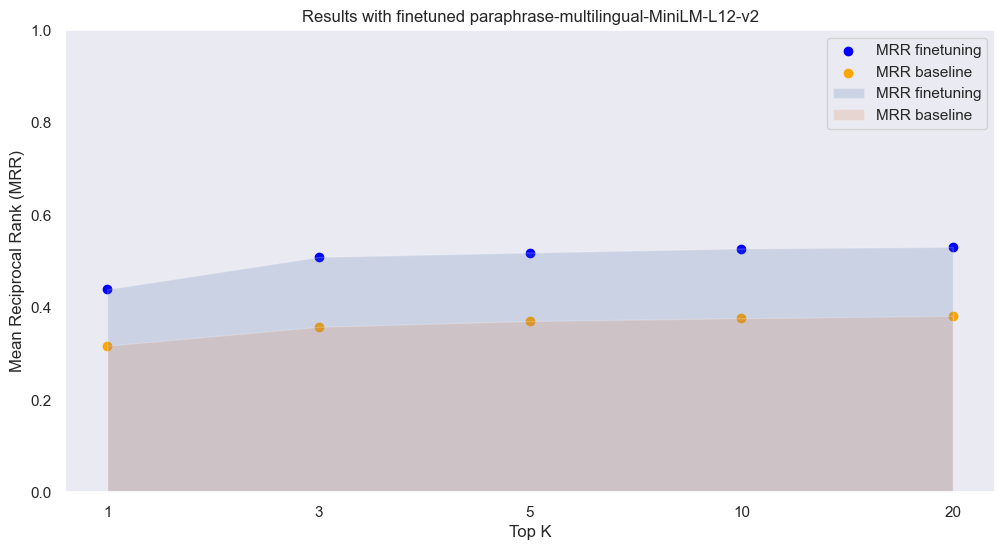

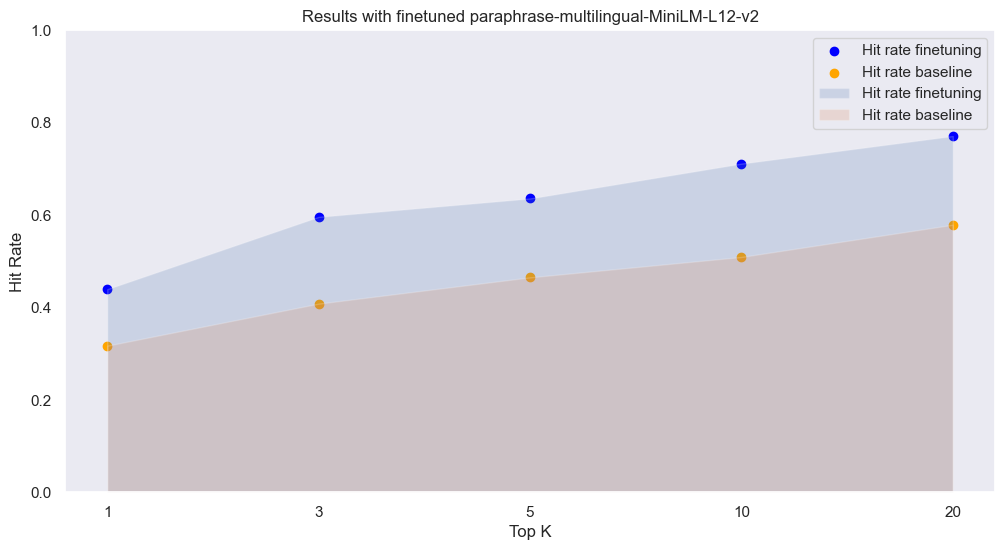

In [29]:
import numpy as np

plt.figure(figsize=(12, 6))
plt.title("Results with finetuned paraphrase-multilingual-MiniLM-L12-v2")
plt.scatter(np.arange(len(df_results_finetuning)), df_results_finetuning["mrr"].values, label="MRR finetuning", color="blue")
plt.scatter(np.arange(len(df_results_no_finetuning)), df_results_no_finetuning["mrr"].values, label="MRR baseline", color="orange")
plt.fill_between(np.arange(len(df_results_finetuning)), df_results_finetuning["mrr"].values, alpha=0.2, label="MRR finetuning")
plt.fill_between(np.arange(len(df_results_no_finetuning)), df_results_no_finetuning["mrr"].values, alpha=0.2, label="MRR baseline")
plt.xlabel("Top K")
plt.ylabel("Mean Reciprocal Rank (MRR)")
plt.xticks(np.arange(len(list_top_k)), list_top_k)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Results with finetuned paraphrase-multilingual-MiniLM-L12-v2")
plt.scatter(np.arange(len(df_results_finetuning)), df_results_finetuning["is_hit"].values, label="Hit rate finetuning", color="blue")
plt.scatter(np.arange(len(df_results_no_finetuning)), df_results_no_finetuning["is_hit"].values, label="Hit rate baseline", color="orange")
plt.fill_between(np.arange(len(df_results_finetuning)), df_results_finetuning["is_hit"].values, alpha=0.2, label="Hit rate finetuning")
plt.fill_between(np.arange(len(df_results_no_finetuning)), df_results_no_finetuning["is_hit"].values, alpha=0.2, label="Hit rate baseline")
plt.xlabel("Top K")
plt.ylabel("Hit Rate")
plt.xticks(np.arange(len(list_top_k)), list_top_k)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()